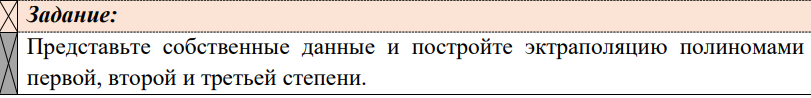

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [ ]:
x = np.array([random.randint(-10, 10) for _ in range(10)])
y = np.array([random.randint(-10, 10) for _ in range(10)])

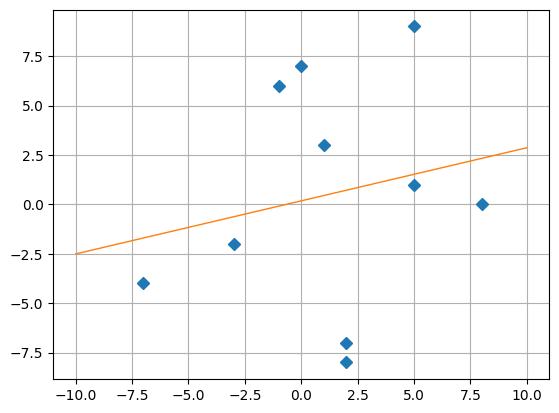

In [ ]:
m = np.vstack((x, np.ones(10))).T
s = np.linalg.lstsq(m, y, rcond=None)[0]

x_prec = np.linspace(-10, 10, 10)
plt.plot(x, y, 'D')
plt.plot(x_prec, s[0]*x_prec+s[1], "-", lw=1)
plt.grid()
plt.show()

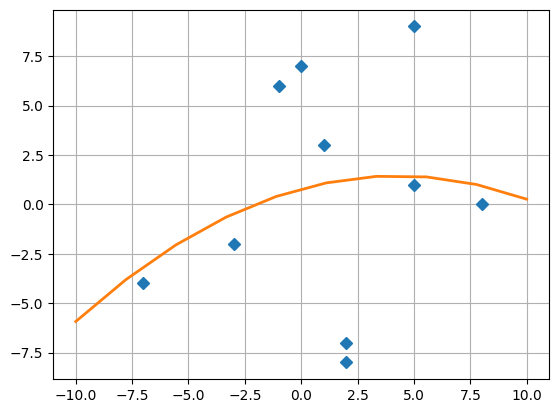

In [ ]:
m = np.vstack((x**2, x, np.ones(10))).T
s = np.linalg.lstsq(m, y, rcond = None)[0]

x_prec = np.linspace(-10, 10, 10)
plt.plot(x, y, 'D')
plt.plot(x_prec, s[0]*x_prec**2+s[1]*x_prec+s[2], "-", lw=2)
plt.grid()
plt.show()

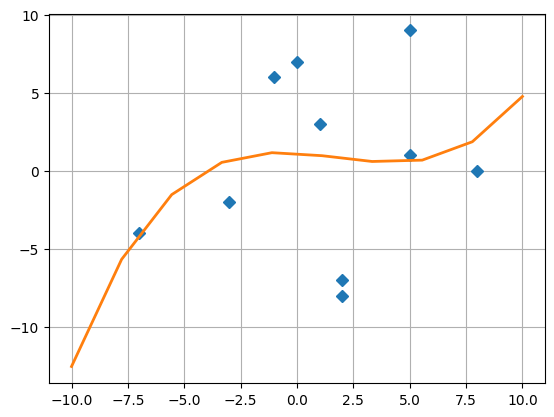

In [ ]:
m = np.vstack((x**3, x**2, x, np.ones(10))).T
s = np.linalg.lstsq(m, y, rcond = None)[0]

x_prec = np.linspace(-10, 10, 10)
plt.plot(x, y, 'D')
plt.plot(x_prec, s[0]*x_prec**3+s[1]*x_prec**2+s[2]*x_prec+s[3], "-", lw=2)
plt.grid()
plt.show()

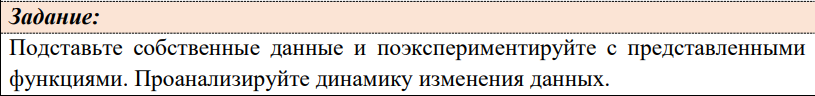

0.013950456538217564
12.266781055956775


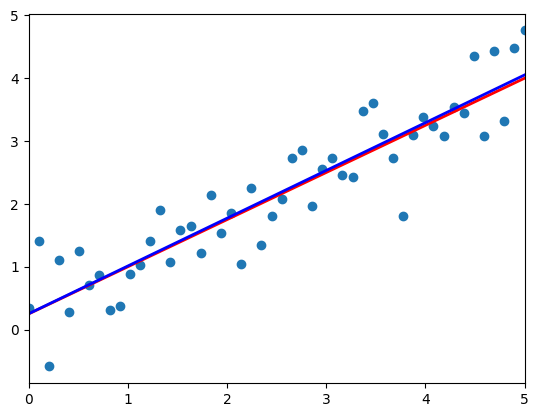

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
beta = (0.25, 0.75)
def f(x, b0, b1):
  return b0 + b1 * x
xdata = np.linspace(0, 5, 50)
y = f(xdata, *beta)
ydata = y + 0.5 * np.random.randn(len(xdata))

beta_opt, beta_cov = curve_fit(f, xdata, ydata)
lin_dev = sum(beta_cov[0])
print(lin_dev)
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
plt.show()

In [ ]:
print(beta_opt)
beta_cov

[0.05613748 0.79828437]


array([[ 0.02297476, -0.00682281],
       [-0.00682281,  0.00272912]])

0.07512392345307756
62.64548130300124


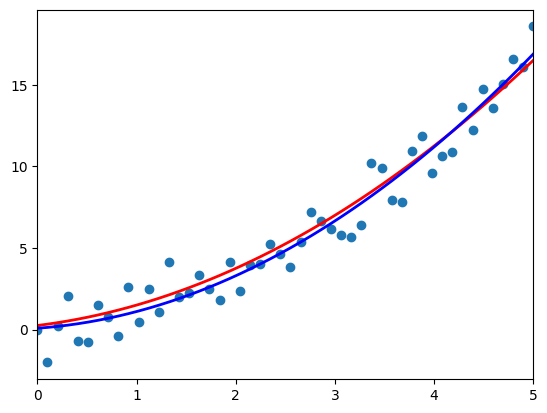

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
beta = (0.25, 0.75, 0.5)
def f(x, b0, b1, b2):
  return b0 + b1 * x + b2 * x**2
xdata = np.linspace(0, 5, 50)
y = f(xdata, *beta)
ydata = y + 1 * np.random.randn(len(xdata))

beta_opt, beta_cov = curve_fit(f, xdata, ydata)
lin_dev = sum(beta_cov[0])
print(lin_dev)
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
plt.show()

0.016631316180730785
38.45894549206148


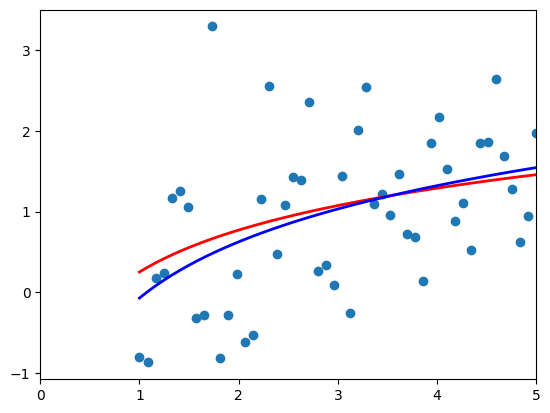

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
beta = (0.25, 0.75)
def f(x, b0, b1):
  return b0 + b1 * np.log(x)
xdata = np.linspace(1, 5, 50)
y = f(xdata, *beta)
ydata = y + 1 * np.random.randn(len(xdata))

beta_opt, beta_cov = curve_fit(f, xdata, ydata)
lin_dev = sum(beta_cov[0])
print(lin_dev)
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
plt.show()

0.04045147252105371
45.170457477843215


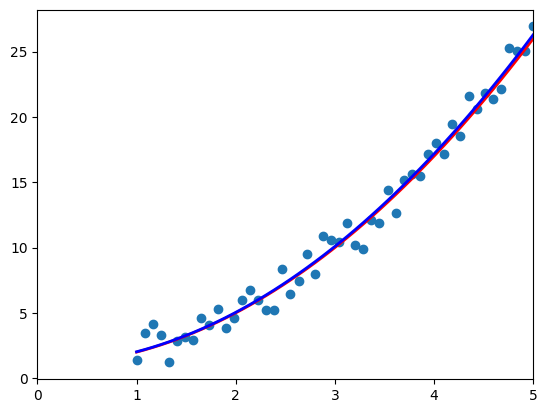

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
beta = (1, 2)
def f(x, b0, b1):
  return b0 + x ** b1
xdata = np.linspace(1, 5, 50)
y = f(xdata, *beta)
ydata = y + 1 * np.random.randn(len(xdata))

beta_opt, beta_cov = curve_fit(f, xdata, ydata)
lin_dev = sum(beta_cov[0])
print(lin_dev)
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
plt.show()

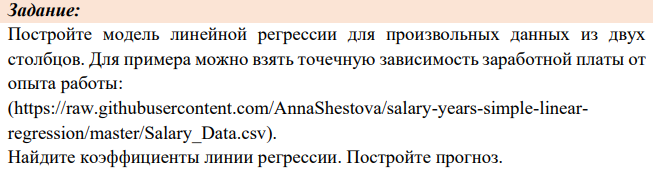

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
my_dict = {'Учебное время': [0.50,0.75,1.00,1.25,1.50,1.75,1.75,2.00,2.25,2.50,2.75,3.00,3.25,3.50,4.00,4.25,4.50,4.75,
5.00,5.50], 'Оценка': [10,22,13,43,20,22,33,50,62,48,55,75,62,73,81,76,64,82,90,93]}
data = pd.DataFrame(my_dict)
data.head()

,Учебное время,Оценка
0,0.50,10
1,0.75,22
2,1.00,13
3,1.25,43
4,1.50,20


In [ ]:
X = data.iloc[:, :-1].values
y = data.iloc[:, 1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2, random_state=0)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print(regressor.intercept_)
print(regressor.coef_)


11.564766839378237
[15.64766839]


In [ ]:
y_pred = regressor.predict(X_test)
print(pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}))
print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred)}')

    Actual  Predicted
0       90  89.803109
1       22  23.300518
2       93  97.626943
3       62  46.772021
4       55  54.595855
5       82  85.891192
6       33  38.948187
7       73  66.331606
8       20  35.036269
9       13  27.212435
10      22  38.948187
11      81  74.155440
12      48  50.683938
13      50  42.860104
14      64  81.979275
15      75  58.507772
Mean Squared Error: 110.36152816182985


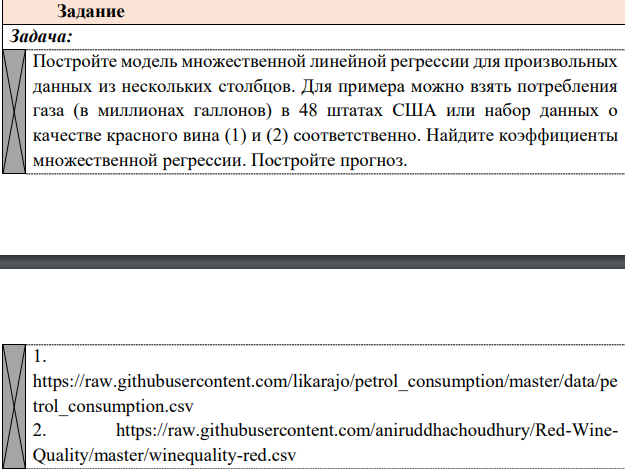

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/likarajo/petrol_consumption/master/data/petrol_consumption.csv')
data.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [ ]:
X = data.drop(columns=['Petrol_Consumption'])
y = data['Petrol_Consumption']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0)
regressor = LinearRegression();
regressor.fit(X_train, y_train)
print(pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient']))

                              Coefficient
Petrol_tax                     -43.200216
Average_income                  -0.067281
Paved_Highways                  -0.005851
Population_Driver_licence(%)  1331.115701


In [ ]:
y_pred = regressor.predict(X_test)
print(pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}))
print(f'MSE: {mean_squared_error(y_pred, y_test)}')

    Actual   Predicted
29     534  468.315946
4      410  550.397078
26     577  590.639321
30     571  572.176794
32     577  649.893941
37     704  648.443789
34     487  515.198650
40     587  674.764637
7      467  503.476378
10     580  500.073610
11     471  417.315045
31     554  587.996148
33     628  624.508204
27     631  605.300526
47     524  563.470521
MSE: 3673.207270692267


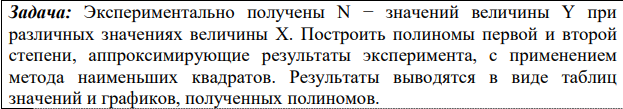

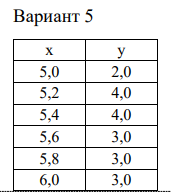

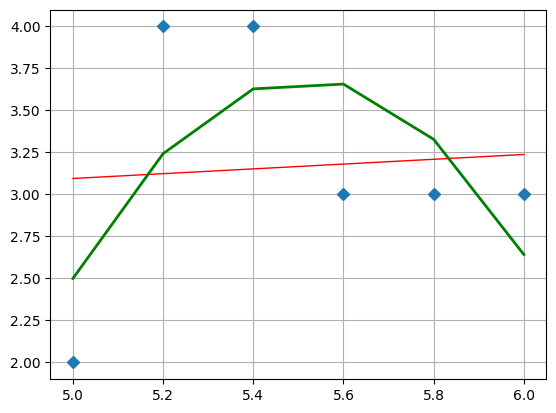

,x,y (истинные),y (линейная),y (квадратичная)
0,5.0,2.0,3.095238,2.500000
1,5.2,4.0,3.123810,3.242857
2,5.4,4.0,3.152381,3.628571
3,5.6,3.0,3.180952,3.657143
4,5.8,3.0,3.209524,3.328571
5,6.0,3.0,3.238095,2.642857


In [ ]:
x = np.array([5.0, 5.2, 5.4, 5.6, 5.8, 6.0])
y = np.array([2.0, 4.0, 4.0, 3.0, 3.0, 3.0])

m = np.vstack((x, np.ones(len(x)))).T
s_linear = np.linalg.lstsq(m, y, rcond=None)[0]

m = np.vstack((x**2, x, np.ones(len(x)))).T
s_quad = np.linalg.lstsq(m, y, rcond=None)[0]

x_prec = np.linspace(5, 6, 6)
y_linear_pred = s_linear[0] * x_prec + s_linear[1]
y_quad_pred = s_quad[0] * x_prec**2 + s_quad[1] * x_prec + s_quad[2]

plt.plot(x, y, 'D')
plt.plot(x_prec, y_linear_pred, "-", lw=1, color='red')
plt.plot(x_prec, y_quad_pred, "-", lw=2, color='green')
plt.grid()
plt.show()

data = {
    'x': x,
    'y (истинные)': y,
    'y (линейная)': y_linear_pred,
    'y (квадратичная)': y_quad_pred
}

table = pd.DataFrame(data)
table